# Anomaly Detection and Time Series

**Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.**

Ans.Anomaly Detection is the process of identifying data points or patterns that significantly deviate from normal behavior.

Types of Anomalies:

1. Point Anomalies

* A single data point is abnormal.

Example: A taxi fare of ₹10,000 for a 2 km ride.

2. Contextual Anomalies

* An anomaly depends on context (time, season, location).

Example: High electricity usage at 3 AM but normal at 6 PM.

3. Collective Anomalies

* A group of data points is anomalous together.

Example: Continuous network traffic spikes indicating a DDoS attack.

**Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.**

Ans.

Isolation Forest:
* Isolates anomalies using random splits
* Large datasets, high-dimensional data

DBSCAN:
* Density-based clustering
* Spatial data, clusters of varying shape

LOF:
* Compares local density
* Detecting subtle local anomalies

**Question 3: What are the key components of a Time Series? Explain each with one
example.**

Ans.Key Components of Time Series

1. Trend

* Long-term upward or downward movement

Example: Increasing airline passengers over years

2. Seasonality

* Repeating patterns at fixed intervals

Example: Higher sales during festivals

3. Cyclic

* Long-term oscillations without fixed frequency

Example: Economic cycles

4. Residual (Noise)

* Random variation

Example: Daily random fluctuations

**Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?**

Ans. A stationary time series has:

* Constant mean

* Constant variance

* No trend or seasonality

Testing Stationarity:

* Visualization
* Statistical Based Test(ADF,KPSS)

Making a Series Stationary:

* Differencing

* Log transformation

* Seasonal differencing
* Root transformation

**Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.**

Ans.**AR**
* Depends on past values
* Trend-based data

**MA**
* Depends on past errors
* Noise smoothing

**ARIMA**
* AR + MA + differencing
* Non-stationary data

**SARIMA**
* ARIMA + seasonality
* Seasonal time series

**SARIMAX**
* SARIMA + exogenous vars
* Weather, holidays

****

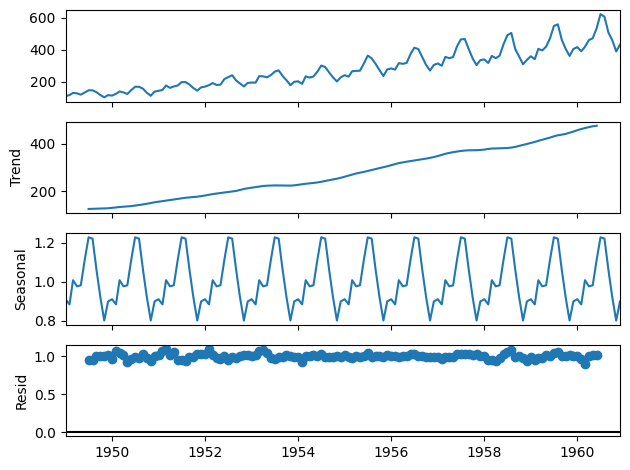

In [2]:
#Q6 Time Series Decomposition (AirPassengers)

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv("AirPassengers.csv", index_col=0, parse_dates=True)
result = seasonal_decompose(data, model='multiplicative')
result.plot()
plt.show()



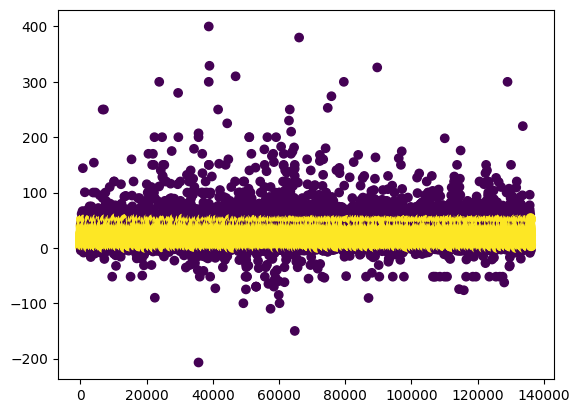

In [4]:
#Q7 Isolation Forest for Anomaly Detection

from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('NYC_taxi_fare_data.csv')
model = IsolationForest(contamination=0.02)
data['anomaly'] = model.fit_predict(data[['fare_amount']])

plt.scatter(data.index, data['fare_amount'], c=data['anomaly'])
plt.show()


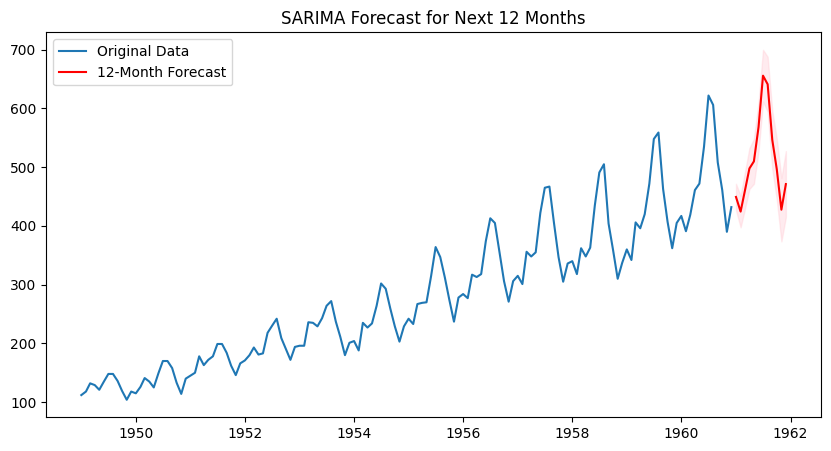

In [21]:
#Q8 SARIMA Forecasting (12 Months)

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("AirPassengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
model = SARIMAX(
    data['#Passengers'],
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
)

results = model.fit()

forecast_12 = results.get_forecast(steps=12)
forecast_values = forecast_12.predicted_mean
confidence_intervals = forecast_12.conf_int()

plt.figure(figsize=(10,5))
plt.plot(data['#Passengers'], label='Original Data')
plt.plot(forecast_values, label='12-Month Forecast', color='red')

plt.fill_between(
    confidence_intervals.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='pink',
    alpha=0.3
)

plt.legend()
plt.title("SARIMA Forecast for Next 12 Months")
plt.show()



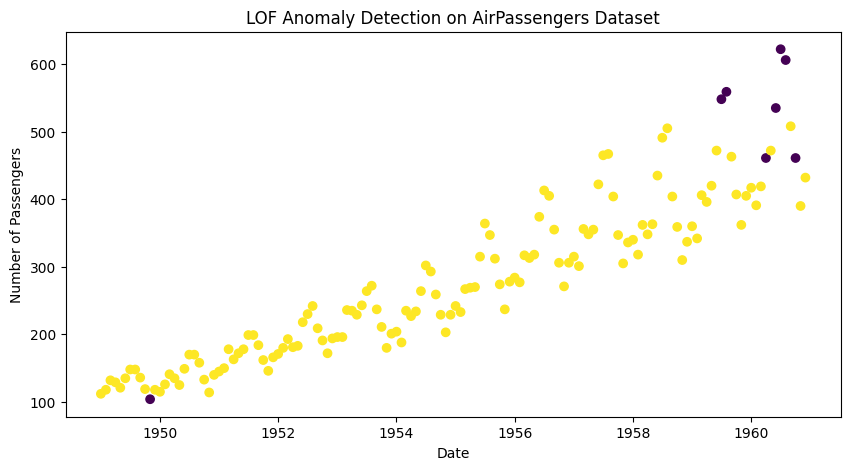

In [28]:
#Q9 Local Outlier Factor (LOF)


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load AirPassengers dataset
data = pd.read_csv("AirPassengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Apply LOF on passenger counts
lof = LocalOutlierFactor(n_neighbors=12, contamination=0.05)
data['anomaly'] = lof.fit_predict(data[['#Passengers']])

# Visualization
plt.figure(figsize=(10,5))
plt.scatter(data.index, data['#Passengers'], c=data['anomaly'])
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('LOF Anomaly Detection on AirPassengers Dataset')
plt.show()


Q10. Anomaly Detection

* Use Isolation Forest for real-time detection

* Sliding window approach for streaming data

Forecasting Model

* SARIMAX (seasonality + weather as exogenous variables)

Validation & Monitoring

* RMSE, MAE

* Model retraining

* Concept drift detection

Business Impact

* Prevent blackouts

* Optimize load distribution

* Reduce operational cost

* Improve reliability